# Regression on Wine Dataset
In this project, we have trained our prediction model using Linear Regression algorithm to predict the quality of the wine which is dependent on various features like type, fixed acidity, citric acid, etc. 

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing

## Importing the dataset

In [2]:
df=pd.read_csv("winequalityN.csv")
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## Performing EDA (Exploratory Data Analysis)

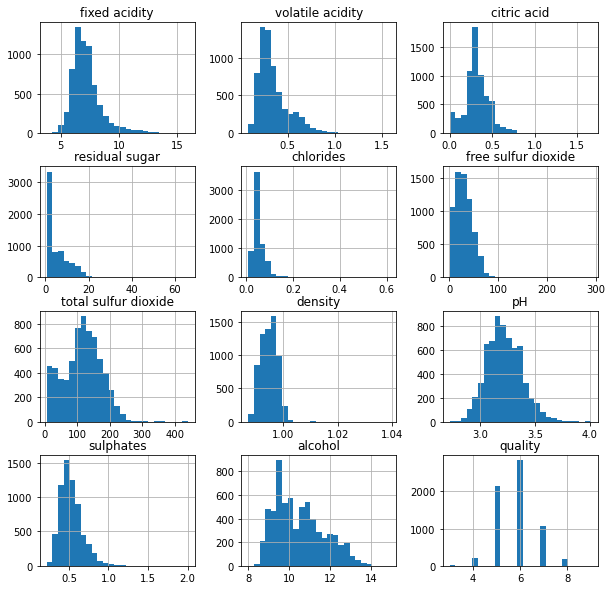

In [3]:
df.hist(bins=25, figsize=(10,10))
plt.show()

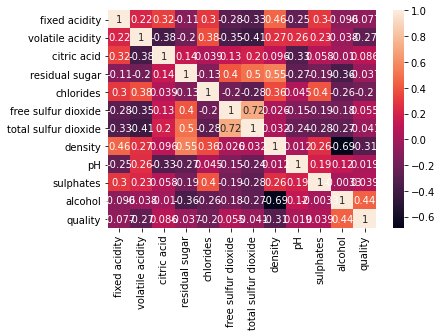

In [4]:
# Corelation graph

sns.heatmap(df.corr(), annot = True)
plt.show()

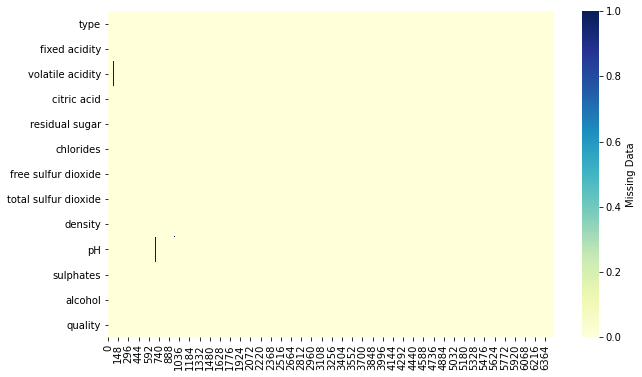

In [5]:
# Graph for missing data.

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

## Data Pre-Processing

In [6]:
# checking the count of null values.

df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
# printing the null values

df.isnull()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,True,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# filling in the null values using the mean value of the particular feature.

df.fillna(df.mean(), inplace=True)
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [9]:
# cheking the null values after replacing the mean values with null values.

df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# checking the datatype of all the attributes.

df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
# converting the object datatype using get_dummies() function.

df=pd.get_dummies(df,columns=['type'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,1,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1,0


In [12]:
# converted datatypes after using get_dummies() function.

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type_red                  uint8
type_white                uint8
dtype: object

In [13]:
# filling in the null values using the mean value of the particular feature.

df.fillna(df.mean(), inplace=True)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,0,1


In [14]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_red                0
type_white              0
dtype: int64

## Predict the quality of wine using Linear Regression

In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type_red', 'type_white'],
      dtype='object')

## Spliting the dataset

In [16]:
# spliting the target dependend and target variable.

x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type_red', 'type_white']]
y = df['quality']

In [17]:
# Spliting the test and train dataset

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size= 0.2, random_state=100)
print("Training set: ",len(x_train))
print("Testing set: ",len(x_test))

Training set:  5197
Testing set:  1300


## Performing Linear Regression

In [18]:
# performing linear regression using LinearRegression function.

lr= LinearRegression()  
lr.fit(x_train, y_train) 

LinearRegression()

In [19]:
#Predicting the Test and Train set result 
y_pred_mlr= lr.predict(x_test)  

## comparing Actual value vs Predicted value

In [20]:
# Made a dataframe to compare Actual value vs Predicted value.

lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
lr_diff.head(20)

,Actual value,Predicted value
5156,5,5.317472
4935,7,5.668322
2757,5,5.575446
3925,5,5.696646
2453,6,6.074301
3723,7,6.094222
1917,6,5.867066
634,6,6.171036
1513,6,6.207250
1228,6,6.288276


## Model Evaluation

In [21]:
# Finding the mean square error and R-Square score.

meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
print('Mean Square Error:', meanSqErr*100,'%')

r2_score = lr.score(x_test,y_test)
print('R-Square score',r2_score*100,'%')

Mean Square Error: 52.55927514364136 %
R-Square score 32.03321853715888 %


## Normalization

In [22]:
# Normaizing the dataset using MinMaxScaler()

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.5,0.0,1.0
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.5,0.0,1.0
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.5,0.0,1.0
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5,0.0,1.0
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5,0.0,1.0


## Spliting the dataset

In [23]:
# Spliting the dataset using train_test_split.

x = scaled_df[[0,1,2,3,4,5,6,7,8,9,10,12,13]]
y = scaled_df[11]

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size= 0.2, random_state=100)
print("Training set: ",len(x_train))
print("Testing set: ",len(x_test))

Training set:  5197
Testing set:  1300


## Performing Linear Regression

In [24]:
# Performing LinearRegression() on Normalized data.

n_lr= LinearRegression()  
n_lr.fit(x_train, y_train) 

LinearRegression()

In [25]:
#Predicting the Test and Train set result.

y_pred_mlr= n_lr.predict(x_test)  
x_pred_mlr= n_lr.predict(x_train)

In [26]:
# Converting the results into Dataframe.

lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
lr_diff.head(20)

,Actual value,Predicted value
5156,0.333333,0.386245
4935,0.666667,0.444720
2757,0.333333,0.429241
3925,0.333333,0.449441
2453,0.500000,0.512384
3723,0.666667,0.515704
1917,0.500000,0.477844
634,0.500000,0.528506
1513,0.500000,0.534542
1228,0.500000,0.548046


## Model Evaluation

In [27]:
# Finding mean square error using mean_squared_error and R-square score.

meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
print('Mean Square Error:', meanSqErr*100,'%')

r2_score = n_lr.score(x_test,y_test)
print('R-Square score', r2_score*100,'%')

Mean Square Error: 1.4599798651011495 %
R-Square score 32.033218537158824 %


## Conclusion:
We sucessfully implemented the above dataset using Linear Regression and calculated the mean square error and R-square score. Then we performend the Normalization on the above dataset and again run the Linear Regression model to get the mean square error and R-square score of the normalized model. The R-square score of both the model is upto similar.